In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking unique values
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [5]:
# checknig the null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
final_data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# create Car_age column
final_data['Car_age'] = 2021 - final_data['Year']
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
# dropping Year column
final_data = final_data.drop(['Year'], axis=1)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Data Preparation

In [11]:
# Creating dummies

final_data = pd.get_dummies(final_data, drop_first=True)

In [12]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


#### Correlation

In [13]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


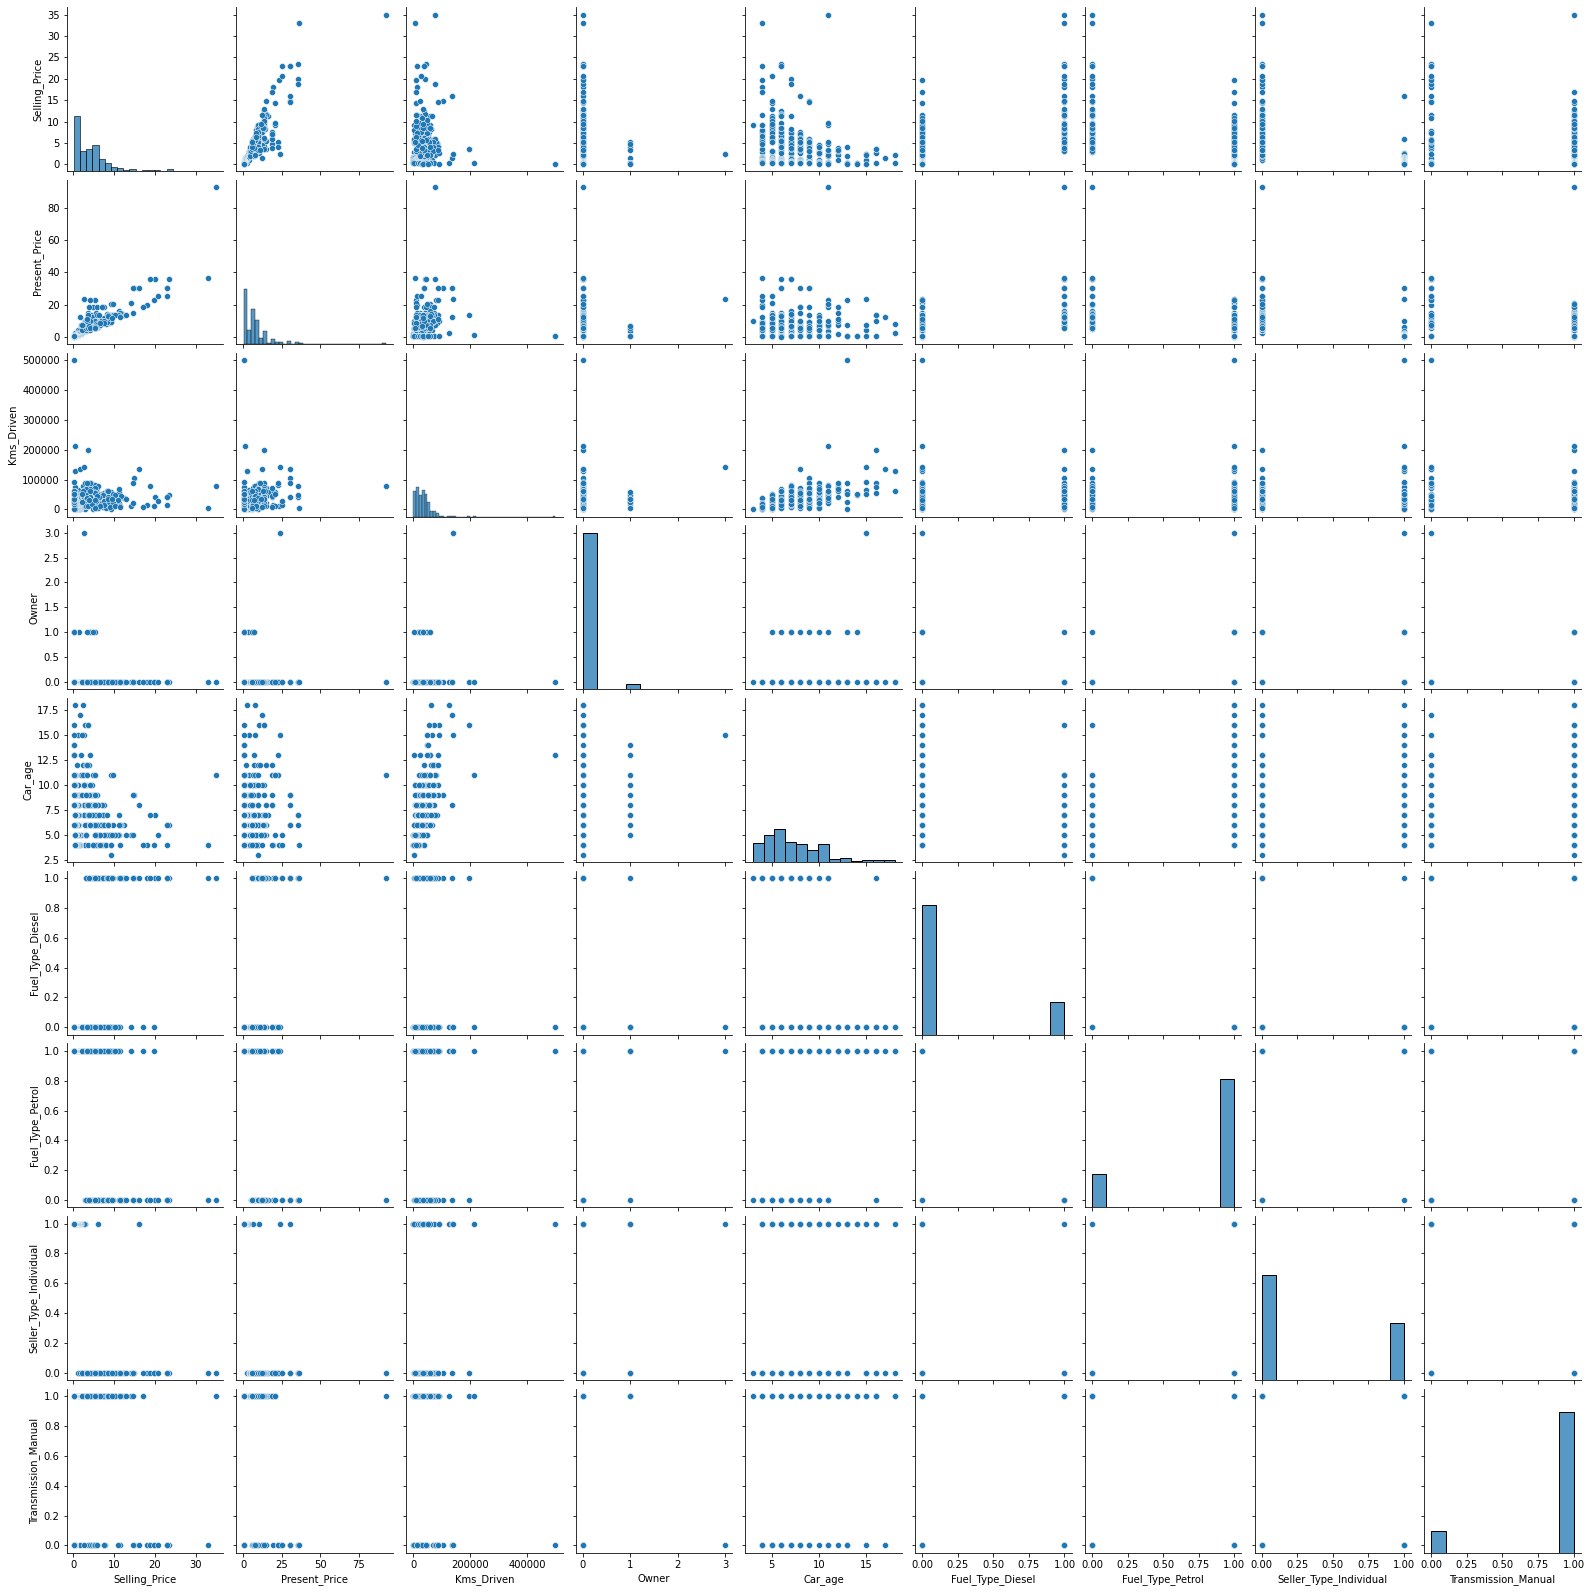

In [14]:
# pairplot

sns.pairplot(final_data)
plt.show()

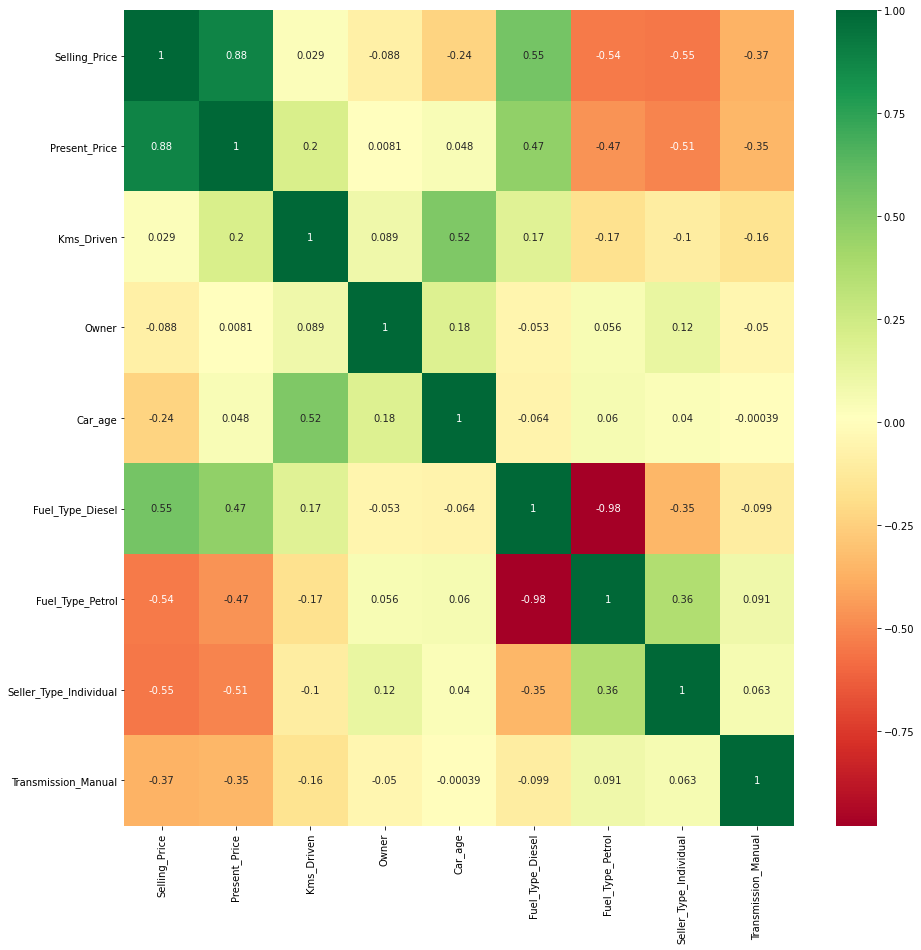

In [15]:
# heatmap
plt.figure(figsize=[15,15])
sns.heatmap(final_data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [16]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Train Test Split 

In [17]:
# importing train test split library
from sklearn.model_selection import train_test_split

In [18]:
# train test split
X = final_data.iloc[:,1:]
y = final_data.Selling_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [20]:
# # to create X_train and y_train CSVs
# X_train.to_csv('X_train.csv', header=True, index=False)
# y_train.to_csv('y_train.csv', header=True, index=False)

In [21]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
41,3.98,46706,0,7,0,1,0,1
160,0.95,24000,0,10,0,1,1,1
206,7.13,12479,0,4,0,1,0,1
59,35.96,41000,0,7,1,0,0,0
162,0.99,14500,0,9,0,1,1,1


#### Standardizing

In [34]:
from sklearn.preprocessing import StandardScaler

In [68]:
cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']
cols

['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']

In [69]:
scaler = StandardScaler()

X_train[cols] = scaler.fit_transform(X_train[cols])

C:\Users\rocks\anaconda3\envs\carprediction\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [70]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
41,-0.415139,0.212079,-0.185695,-0.166111,0,1,0,1
160,-0.748487,-0.335880,-0.185695,0.864921,0,1,1,1
206,-0.068590,-0.613913,-0.185695,-1.197143,0,1,0,1
59,3.103160,0.074377,-0.185695,-0.166111,1,0,0,0
162,-0.744086,-0.565141,-0.185695,0.521244,0,1,1,1


### Model Building

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lgr = LinearRegression()
lgr.fit(X_train, y_train)
lgr.coef_

array([ 4.10078124e-01, -4.92862391e-06,  5.92180169e-01, -3.89087536e-01,
        2.48139298e+00,  4.70822220e-01, -1.23245336e+00, -1.55622571e+00])

In [24]:
y_train_pred = lgr.predict(X_train)

### Model Evaluation

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2 = r2_score(y_train, y_train_pred)
r2

0.8999953432358123

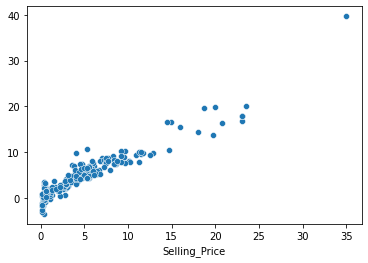

In [27]:
# scatter plot

sns.scatterplot(x=y_train, y=y_train_pred)
plt.show()

#### Residuals

C:\Users\rocks\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


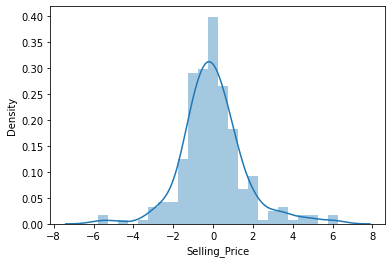

In [28]:
# residual distribution

sns.distplot(y_train-y_train_pred)
plt.show()

### Prediction on Test set 

In [41]:
# # len(X_train.columns)

# pPrice = float(input("Present Price:"))
# kmsDriven = int(input("Kms Driven:"))
# noOfOwners = int(input("No of Owners:"))
# carAge = int(input("Car Age in Years:"))
# diesel = int(input("Diesel(1/0):"))
# petrol = int(input("Petrol(1/0):"))
# individual = int(input("Individual(1/0):"))
# manual = int(input("Manual(1/0):"))


Present Price:10.5
Kms Driven:50000
No of Owners:2
Car Age in Years:8
Diesel(1/0):1
Petrol(1/0):0
Individual(1/0):1
Manual(1/0):0


In [50]:
# data_lst = [pPrice, kmsDriven, noOfOwners, carAge, diesel, petrol, individual, manual]
# dic = {}

# for i in range(len(X_train.columns)):
#     dic[X_train.columns[i]] = data_lst[i]

# # dic
# testing_df = pd.DataFrame(dic, index=[0])
# testing_df

,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10.5,50000,2,8,1,0,1,0


In [51]:
# out_predit = lgr.predict(testing_df)
# out_predit

array([8.84950651])

### Scaling 

In [78]:
cols

['Present_Price', 'Kms_Driven', 'Owner', 'Car_age']

In [79]:
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

C:\Users\rocks\anaconda3\envs\carprediction\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
199,-0.789192,0.363970,-0.185695,2.239631,0,1,1,1
201,-0.105995,0.484634,5.385165,1.208599,1,0,0,1
111,-0.687978,-0.705111,-0.185695,-0.853465,0,1,1,1
125,-0.660474,0.050244,-0.185695,1.552276,0,1,1,1
46,-0.315025,0.642269,-0.185695,0.177567,0,1,0,1


### Prediction and Evaluation

In [80]:
y_test_pred = lgr.predict(X_test)
y_test_pred

array([-2.31893638,  5.20547255,  1.77846136, -0.99689779,  2.95864202,
        3.64257437,  4.17687405,  3.79252956,  1.04824294,  3.4910983 ,
        0.92214703,  6.89521651,  8.70581795,  5.42038862,  2.24552139,
        7.42617346,  9.67940335, -0.08579162,  6.60856417,  1.90659052,
        1.93729283,  9.30207585,  4.23078383,  0.96957712,  6.29095695,
        9.13199042,  3.3409618 ,  4.6606898 ,  1.47340966,  1.69482848,
        7.49427173, 10.4287413 ,  4.83108014,  6.01434024,  8.66205945,
        3.52074128,  3.49425504, 10.95426664,  2.58211976,  7.61237029,
        6.60787416,  5.06384896,  6.24765568,  4.72286279,  4.18139329,
        1.00965685,  1.97847774,  3.97663706,  0.74948789,  4.29352273,
       21.22211926,  1.37773526,  4.35854652,  7.03979801,  6.98219919,
        2.85620371,  7.23319152,  2.17791822,  2.81170049,  3.17232274,
       -2.83167534])

In [81]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.7881190801068392

C:\Users\rocks\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

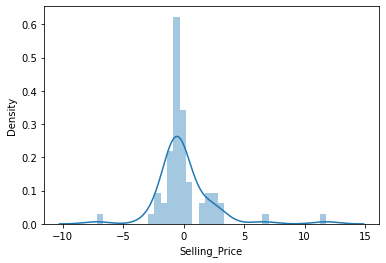

In [83]:
sns.distplot(y_test-y_test_pred)